In [177]:
!pip install selenium

In [187]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [181]:
# setup chrome driver
driver = webdriver.Chrome()

In [183]:
driver.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')

In [272]:
movies = driver.find_elements(By.CLASS_NAME, 'ipc-metadata-list-summary-item')

In [281]:
title = []
release_year = []
rating = []
duration = []
content_rating = []
no_of_votes = []
for movie in movies:
    try:
        t = movie.find_element(By.TAG_NAME, 'h3').text
        title.append(t)
    except:
        titlw.append('NA')
    span_ = movie.find_elements(By.CLASS_NAME, 'sc-300a8231-7')
    try:
        y = span_[0].text
        release_year.append(y)
    except:
        release_year.append('NA')
    try:
        d = span_[1].text
        duration.append(d)
    except:
        duration.append('NA')
    try:    
        cr = span_[2].text
        content_rating.append(cr)
    except:
        content_rating.append('NA')
    try:
        r = movie.find_element(By.CLASS_NAME, 'ipc-rating-star--rating').text
        rating.append(r)
    except:
        rating.append('NA')
    try:    
        v = movie.find_element(By.CLASS_NAME, 'ipc-rating-star--voteCount').text
        no_of_votes.append(v)
    except:
        no_of_votes.append('NA')

In [283]:
data = {'Title':title,'Release_year':release_year,'Duration':duration,'Rating':rating, 'Content_rating':content_rating, 'No_of_votes':no_of_votes}
df = pd.DataFrame(data)
df

,Title,Release_year,Duration,Rating,Content_rating,No_of_votes
0,1. The Shawshank Redemption,1994,2h 22m,9.3,R,(3M)
1,2. The Godfather,1972,2h 55m,9.2,R,(2.1M)
2,3. The Dark Knight,2008,2h 32m,9.0,PG-13,(3M)
3,4. The Godfather Part II,1974,3h 22m,9.0,R,(1.4M)
4,5. 12 Angry Men,1957,1h 36m,9.0,Approved,(898K)
...,...,...,...,...,...,...
245,246. Amores Perros,2000,2h 34m,8.0,R,(257K)
246,247. Rebecca,1940,2h 10m,8.1,Approved,(150K)
247,248. The Help,2011,2h 26m,8.1,PG-13,(504K)
248,249. A Silent Voice: The Movie,2016,2h 10m,8.1,Not Rated,(110K)


# Data Cleaning

In [287]:
# check null values
df.isnull().sum()

Title             0
Release_year      0
Duration          0
Rating            0
Content_rating    0
No_of_votes       0
dtype: int64

In [289]:
# check datatypes
df.dtypes

Title             object
Release_year      object
Duration          object
Rating            object
Content_rating    object
No_of_votes       object
dtype: object

In [291]:
df['Title'] = df['Title'].str.replace(r'^\d+\. ', '', regex=True)

In [317]:
df['Release_year'] = df['Release_year'].astype(int)

In [319]:
df['Rating'] = df['Rating'].astype(float)

In [295]:
df['No_of_votes'] = df['No_of_votes'].str.replace(r'[()]', '', regex=True)

In [321]:
df

,Title,Release_year,Duration,Rating,Content_rating,No_of_votes,Duration_in_minutes
0,The Shawshank Redemption,1994,2h 22m,9.3,R,3M,142
1,The Godfather,1972,2h 55m,9.2,R,2.1M,175
2,The Dark Knight,2008,2h 32m,9.0,PG-13,3M,152
3,The Godfather Part II,1974,3h 22m,9.0,R,1.4M,202
4,12 Angry Men,1957,1h 36m,9.0,Approved,898K,96
...,...,...,...,...,...,...,...
245,Amores Perros,2000,2h 34m,8.0,R,257K,154
246,Rebecca,1940,2h 10m,8.1,Approved,150K,130
247,The Help,2011,2h 26m,8.1,PG-13,504K,146
248,A Silent Voice: The Movie,2016,2h 10m,8.1,Not Rated,110K,130


In [303]:
df['Duration'].unique()

array(['2h 22m', '2h 55m', '2h 32m', '3h 22m', '1h 36m', '3h 21m',
       '3h 15m', '2h 34m', '2h 58m', '2h 59m', '2h 19m', '2h 28m',
       '2h 4m', '2h 16m', '2h 25m', '2h 13m', '2h 49m', '2h 7m', '2h 10m',
       '3h 27m', '1h 58m', '3h 9m', '1h 56m', '2h 17m', '2h 1m', '2h 30m',
       '2h 12m', '2h 35m', '1h 49m', '1h 28m', '2h 31m', '1h 46m',
       '2h 20m', '1h 59m', '1h 50m', '1h 42m', '1h 52m', '2h 54m',
       '2h 46m', '1h 27m', '1h 57m', '2h 45m', '2h 27m', '1h 53m',
       '1h 38m', '1h 55m', '2h 29m', '2h 26m', '2h 5m', '2h 33m',
       '2h 44m', '1h 45m', '2h 40m', '1h 21m', '1h 35m', '2h', '3h 1m',
       '2h 2m', '2h 6m', '2h 23m', '2h 50m', '3h 49m', '1h 43m', '2h 11m',
       '1h 48m', '1h 39m', '3h 47m', '1h 47m', '2h 8m', '3h', '2h 9m',
       '2h 3m', '2h 42m', '2h 18m', '1h 29m', '2h 36m', '1h 54m',
       '2h 41m', '1h 8m', '1h 37m', '2h 38m', '2h 15m', '1h 51m',
       '1h 40m', '2h 52m', '1h 31m', '3h 58m', '1h 33m', '2h 21m',
       '1h 26m', '3h 32m', '3h 5

In [309]:
def convert_duration_to_minutes(duration):
    if 'h' in duration and 'm' in duration:  
        hours, minutes = duration.split('h')
        hours = int(hours.strip())
        minutes = int(minutes.strip().replace('m', ''))
        return hours * 60 + minutes
    elif 'h' in duration:  
        hours = int(duration.strip().replace('h', ''))
        return hours * 60
    elif 'm' in duration:  
        minutes = int(duration.strip().replace('m', ''))
        return minutes
    else:
        return None  

In [311]:
df['Duration_in_minutes'] = df['Duration'].apply(convert_duration_to_minutes)

In [313]:
df

,Title,Release_year,Duration,Rating,Content_rating,No_of_votes,Duration_in_minutes
0,The Shawshank Redemption,1994,2h 22m,9.3,R,3M,142
1,The Godfather,1972,2h 55m,9.2,R,2.1M,175
2,The Dark Knight,2008,2h 32m,9.0,PG-13,3M,152
3,The Godfather Part II,1974,3h 22m,9.0,R,1.4M,202
4,12 Angry Men,1957,1h 36m,9.0,Approved,898K,96
...,...,...,...,...,...,...,...
245,Amores Perros,2000,2h 34m,8.0,R,257K,154
246,Rebecca,1940,2h 10m,8.1,Approved,150K,130
247,The Help,2011,2h 26m,8.1,PG-13,504K,146
248,A Silent Voice: The Movie,2016,2h 10m,8.1,Not Rated,110K,130


In [315]:
df['No_of_votes'].unique()

array([' 3M', ' 2.1M', ' 1.4M', ' 898K', ' 2M', ' 1.5M', ' 2.3M', ' 834K',
       ' 1.8M', ' 2.4M', ' 2.6M', ' 1.3M', ' 1.1M', ' 2.2M', ' 1.9M',
       ' 512K', ' 377K', ' 1.6M', ' 821K', ' 762K', ' 1.2M', ' 883K',
       ' 943K', ' 1M', ' 1.7M', ' 739K', ' 332K', ' 421K', ' 75K',
       ' 620K', ' 956K', ' 293K', ' 557K', ' 267K', ' 994K', ' 536K',
       ' 359K', ' 202K', ' 728K', ' 420K', ' 136K', ' 244K', ' 705K',
       ' 221K', ' 144K', ' 794K', ' 625K', ' 440K', ' 530K', ' 659K',
       ' 272K', ' 448K', ' 341K', ' 57K', ' 387K', ' 268K', ' 112K',
       ' 106K', ' 922K', ' 915K', ' 93K', ' 323K', ' 203K', ' 216K',
       ' 355K', ' 172K', ' 475K', ' 174K', ' 438K', ' 809K', ' 823K',
       ' 808K', ' 899K', ' 339K', ' 265K', ' 286K', ' 967K', ' 213K',
       ' 826K', ' 191K', ' 930K', ' 706K', ' 632K', ' 180K', ' 383K',
       ' 954K', ' 122K', ' 219K', ' 282K', ' 608K', ' 289K', ' 88K',
       ' 139K', ' 204K', ' 142K', ' 657K', ' 579K', ' 744K', ' 140K',
       ' 715K', ' 446

In [329]:
# Function to convert the No_of_votes column to numeric (integer)
def convert_votes(value):
    value = value.strip() 
    if value.endswith('M'):
        return int(float(value[:-1]) * 1_000_000)  # Convert 'M' to millions
    elif value.endswith('K'):
        return int(float(value[:-1]) * 1_000)  # Convert 'K' to thousands 
    else:
        return int(float(value)) 

df['No_of_votes_numeric'] = df['No_of_votes'].apply(convert_votes)


In [331]:
df

,Title,Release_year,Duration,Rating,Content_rating,No_of_votes,Duration_in_minutes,No_of_votes_numeric
0,The Shawshank Redemption,1994,2h 22m,9.3,R,3M,142,3000000
1,The Godfather,1972,2h 55m,9.2,R,2.1M,175,2100000
2,The Dark Knight,2008,2h 32m,9.0,PG-13,3M,152,3000000
3,The Godfather Part II,1974,3h 22m,9.0,R,1.4M,202,1400000
4,12 Angry Men,1957,1h 36m,9.0,Approved,898K,96,898000
...,...,...,...,...,...,...,...,...
245,Amores Perros,2000,2h 34m,8.0,R,257K,154,257000
246,Rebecca,1940,2h 10m,8.1,Approved,150K,130,150000
247,The Help,2011,2h 26m,8.1,PG-13,504K,146,504000
248,A Silent Voice: The Movie,2016,2h 10m,8.1,Not Rated,110K,130,110000


In [335]:
df.dtypes

Title                   object
Release_year             int32
Duration                object
Rating                 float64
Content_rating          object
No_of_votes             object
Duration_in_minutes      int64
No_of_votes_numeric      int64
dtype: object

# EDA

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

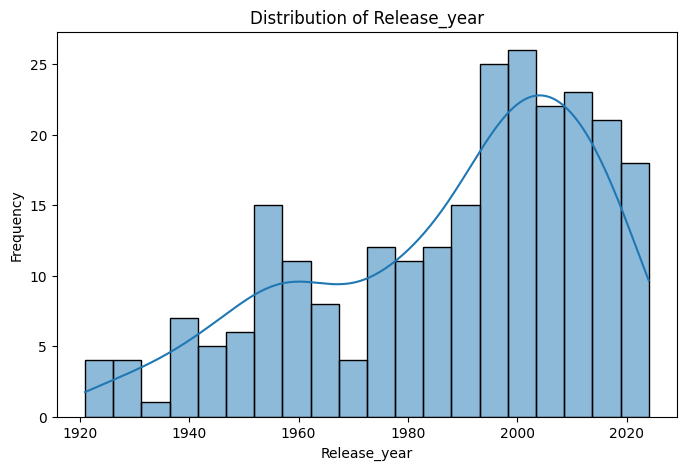

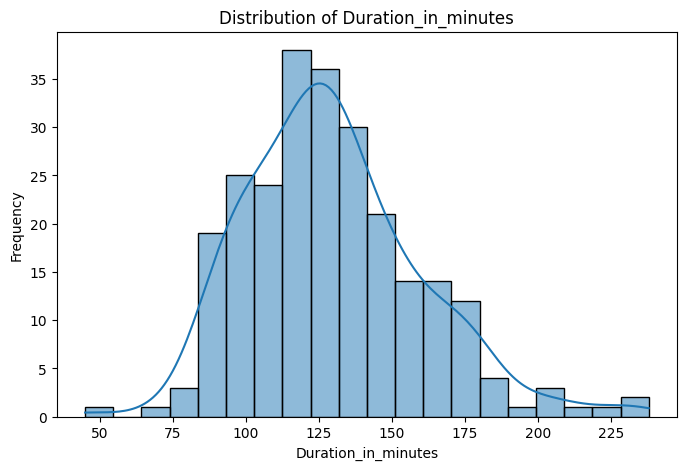

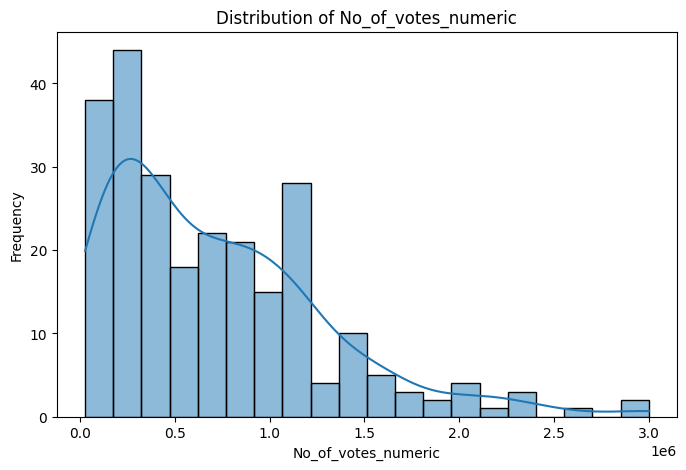

In [343]:
# Univariate Analysis: Visualizing distribution of numerical columns
numerical_columns = ['Release_year', 'Duration_in_minutes', 'No_of_votes_numeric']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

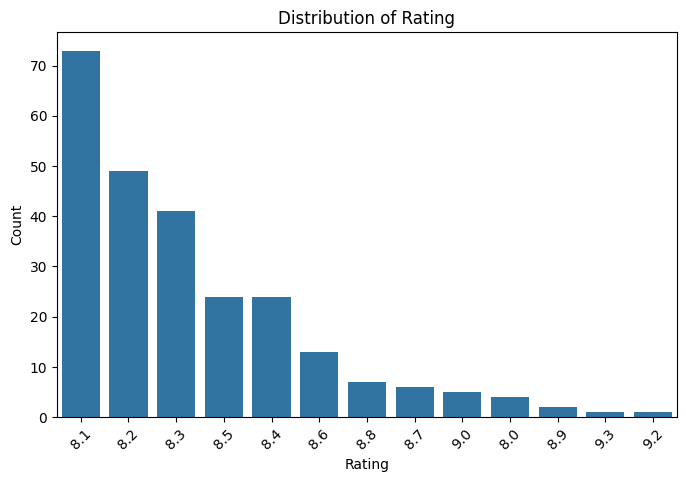

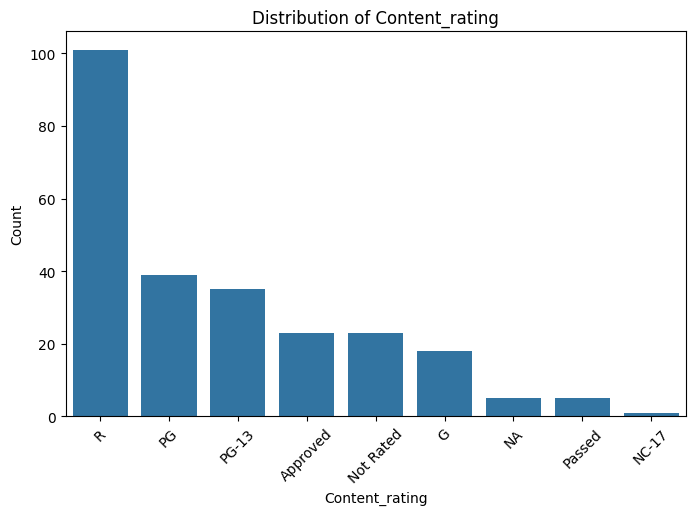

In [345]:
# Univariate Analysis: Visualizing distribution of categorical columns
categorical_columns = ['Rating', 'Content_rating']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

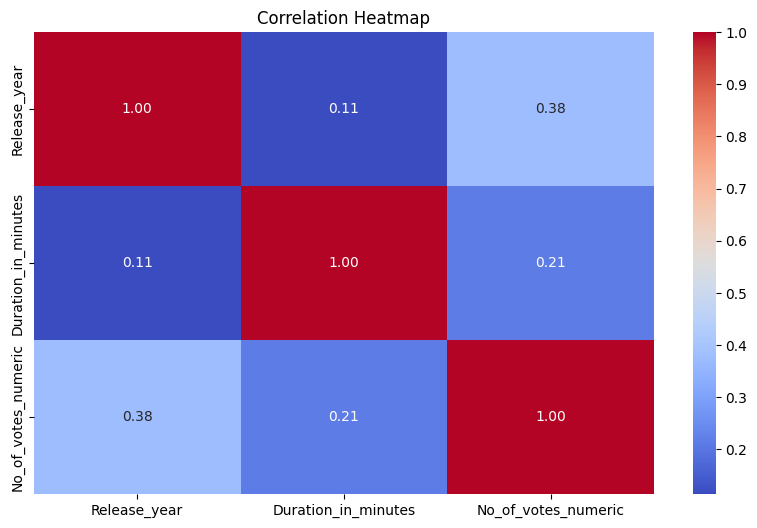

In [347]:
# Bivariate Analysis: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

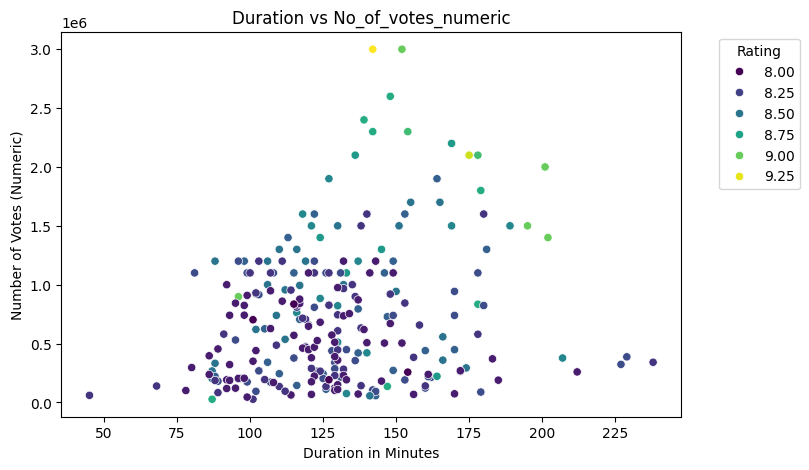

In [349]:
# Bivariate Analysis: Duration vs No_of_votes_numeric
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Duration_in_minutes', y='No_of_votes_numeric', hue='Rating', palette='viridis')
plt.title("Duration vs No_of_votes_numeric")
plt.xlabel("Duration in Minutes")
plt.ylabel("Number of Votes (Numeric)")
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


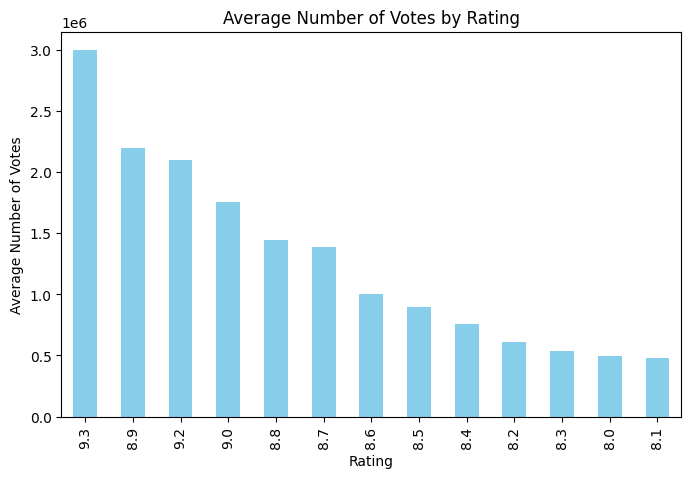

In [353]:
# Bar plot: Average number of votes by rating
plt.figure(figsize=(8, 5))
grouped_data['No_of_votes_numeric'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Average Number of Votes by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Number of Votes")
plt.show()

In [359]:
# Top 10 Movies by Number of Votes
top_10_movies = df.sort_values(by='No_of_votes_numeric', ascending=False).head(10)
print("\nTop 10 Movies by Number of Votes:")
print(top_10_movies[['Title', 'No_of_votes_numeric']])


Top 10 Movies by Number of Votes:
                                                Title  No_of_votes_numeric
0                            The Shawshank Redemption              3000000
2                                     The Dark Knight              3000000
13                                          Inception              2600000
12                                         Fight Club              2400000
7                                        Pulp Fiction              2300000
10                                       Forrest Gump              2300000
18                                       Interstellar              2200000
1                                       The Godfather              2100000
8   The Lord of the Rings: The Fellowship of the Ring              2100000
15                                         The Matrix              2100000


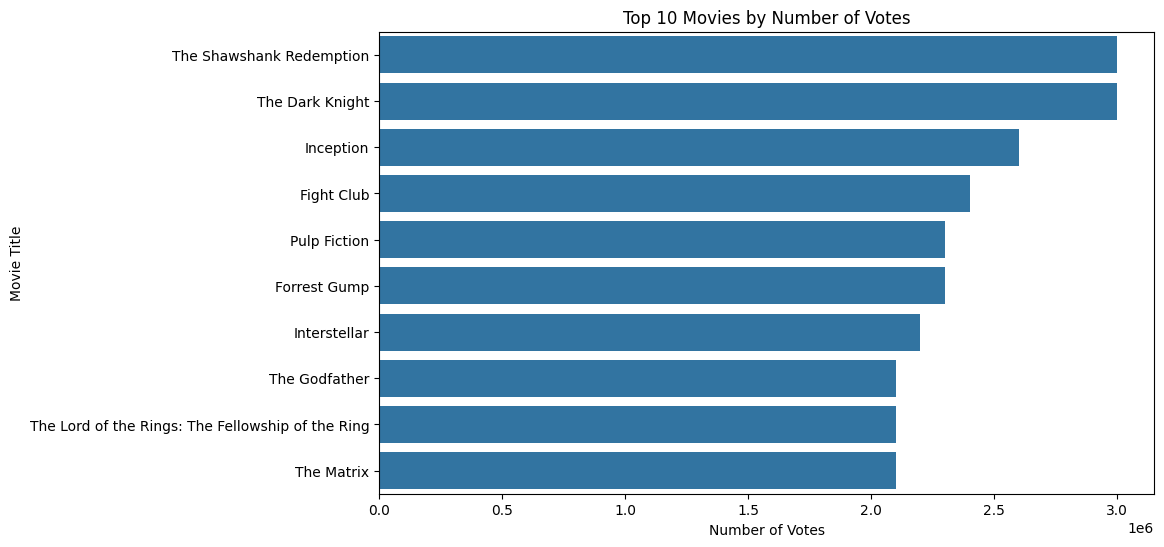

In [369]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_movies, x='No_of_votes_numeric', y='Title')
plt.title("Top 10 Movies by Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Movie Title")
plt.show()

In [371]:
column_order = [
    'Title',
    'Release_year',
    'Duration',
    'Duration_in_minutes',
    'Rating',
    'Content_rating',
    'No_of_votes',
    'No_of_votes_numeric'
]
df = df[column_order]

In [377]:
# save as csv file
output_file = 'movies_data.csv'
df.to_csv(output_file, index=False)